# Jet Vertex Charge

**Goal:** Beojean showed this info that the min $\Delta R_{jj}$ wasn't very effective fore lower $\Delta R_{jj}^{HC 1}$, so I wanted to see whether we could use info like jet charge or the helicity angles to help min $\Delta R_{jj}^{HC 1}$ out.

In [72]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import sys
sys.path.append("../code")
from preprocess import *
from plotting import massPlane

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Note:** The jet vertex charge was not saved for pflow jets, so I had to download the corresponding miniNtuple for EMTopo jets.

In [73]:
# #filename = "/u/ki/nhartman/gpfs/public/hh4b/SMNR/user.bstanisl.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.pflow_vr-systs-resolved_MiniNTuple.root/user.bstanisl.17142219._000001.MiniNTuple.root"
# filename = "/u/ki/nhartman/gpfs/public/hh4b/SMNR/user.saparede.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.61-FEB2019-Prod.topo-systs-boosted_MiniNTuple.root/user.saparede.17153038._000007.MiniNTuple.root"
#filename = "/u/ki/nhartman/gpfs/public/hh4b/gravitons/X300/user.wbalunas.HH4B.301488.RS_graviton.MC16a-2015-2016.AB21.2.61-APR2019-SemiMerged.topo_inter_MiniNTuple.root/user.wbalunas.17708001._000001.MiniNTuple.root"

In [74]:
# treeName = "XhhMiniNtuple"
# myTree = uproot.open(filename)[treeName]
# miniNtuple = myTree.pandas.df(flatten=False)

In [75]:
# for c in miniNtuple.columns:
#     if 'truth' in c:
#         print(c)

**Good news:** [Jet vertex charge](https://cds.cern.ch/record/2048132/files/ATL-PHYS-PUB-2015-040.pdf) is already saved in the miniNtuple, and it's [also calibrated](https://cds.cern.ch/record/2622370/files/ATLAS-CONF-2018-022.pdf).

Let's look at this variable for our candidate analysis jets, or the jets that have been tagged at the 70% WP.

Ok, what does this look separated by the charge of the associated $b$-quarks?

Note: we're saving the $b$-quarks, not the $b$-hadrons.

In [76]:
reload = False

#physicsSample = 'SMNR_Topo-FEB2019'
physicsSample = 'graviton300_Topo-APR2019'
trigger ='2016_triggers'

fDir = "../data/{}/".format(physicsSample)
fName = "files/df_f_0.22_00*.h5"

In [77]:
figDir = 'figures'

if 'SMNR' not in physicsSample:
    figDir += "/" + physicsSample

In [78]:
if reload:

    dfs = []
    for myFile in tqdm(glob.glob(fDir + fName)):

        dfi = pd.read_hdf(myFile,key='df')
        loadMask = dfi.fourGoodJets & (dfi.nbtags >= 4) & dfi[trigger]
        dfs.append(dfi.loc[loadMask, dfi.columns])
        
    df = pd.concat(dfs)
    
    # Save the df for future use
    df.to_hdf(fDir + "df_f_0.22.h5", key='df',mode='w')
    
else:
    
    df = pd.read_hdf(fDir + "df_f_0.22.h5",key='df')
    

In [79]:
len(df)

1723

In [80]:
for c in df.columns:
    print(c)

eventNumber
nresolvedJets
nmuon
passedTriggerHashes
resolvedJets_E
resolvedJets_pt
resolvedJets_phi
resolvedJets_eta
resolvedJets_MV2c10
resolvedJets_is_MV2c10_FixedCutBEff_70
resolvedJets_JetVertexCharge_discriminant
muon_pt
muon_eta
muon_phi
muon_m
muon_EnergyLoss
resolvedJets_SF_MV2c10_FixedCutBEff_70
mcChannelNumber
mcEventWeight
truth_pt
truth_eta
truth_phi
truth_E
truth_pdgId
truth_barcode
truth_child_barcode
truth_parent_barcode
mc_sf
pair0_HC1_m
pair0_HC1_dRjj
pair0_HC1_pt
pair0_HC1_eta
pair0_HC1_phi
pair0_HC2_m
pair0_HC2_dRjj
pair0_HC2_pt
pair0_HC2_eta
pair0_HC2_phi
pair1_HC1_m
pair1_HC1_dRjj
pair1_HC1_pt
pair1_HC1_eta
pair1_HC1_phi
pair1_HC2_m
pair1_HC2_dRjj
pair1_HC2_pt
pair1_HC2_eta
pair1_HC2_phi
pair2_HC1_m
pair2_HC1_dRjj
pair2_HC1_pt
pair2_HC1_eta
pair2_HC1_phi
pair2_HC2_m
pair2_HC2_dRjj
pair2_HC2_pt
pair2_HC2_eta
pair2_HC2_phi
pair0_Dhh
pair1_Dhh
pair2_Dhh
HC1_pt
HC1_eta
HC1_phi
HC1_m
HC1_ntags
HC2_pt
HC2_eta
HC2_phi
HC2_m
HC2_ntags
j0_pt
j0_eta
j0_phi
j0_m
j0_idx
j0_jvc

In [81]:
badJets = df.badJets

In [82]:
np.sum(df.loc[~badJets,'mc_sf']) / np.sum(df['mc_sf'])

0.7014248960107623

Ok, this is consistent with the #s that I saw from before with my PFlow studies: $\approx$ 80% of the jets are not truth matched to one of our analysis jets.

**Discrimination for $b$ adn $\bar{b}$ jets in our samples**

I think it might be interesting first to look at the discrimination for the jets in our Ntuples.


The lines below go over the logic of matching the b-jets to the $b$ and $\bar{b}$-quarks.

In [83]:
my_jvcs = np.vstack(df[['j{}_jvc'.format(i) for i in range(4)]].values)

In [84]:
bpdgs = np.vstack(df[['b{}_pdg'.format(i) for i in range(4)]].values)

In [85]:
b_selJetIdx = np.vstack(df[['b{}_selJet_jidx'.format(i) for i in range(4)]].values)

In [86]:
b_selJetIdx[:3]

array([[2, 3, 0, 1],
       [3, 2, 1, 0],
       [3, 0, 1, 2]])

In [87]:
bpdgs[:3]

array([[-5, -5,  5,  5],
       [ 5, -5,  5, -5],
       [ 5,  5, -5, -5]])

In [88]:
b_selJetIdx[bpdgs == 5].reshape(-1,2)[:3]

array([[0, 1],
       [3, 1],
       [3, 0]])

In [89]:
my_jvcs[:3]

array([[-1.05628884,  1.1595943 ,  2.0080781 ,  1.54873264],
       [-0.42992035, -0.90978956, -0.88833791, -2.06076789],
       [ 1.39079106,  0.51555318,  0.78179526, -0.2526409 ]])

In [90]:
b_jvcs = np.array([v[i] for i,v in zip(b_selJetIdx[bpdgs == 5].reshape(-1,2),my_jvcs)])
bbar_jvcs = np.array([v[i] for i,v in zip(b_selJetIdx[bpdgs == -5].reshape(-1,2),my_jvcs)])

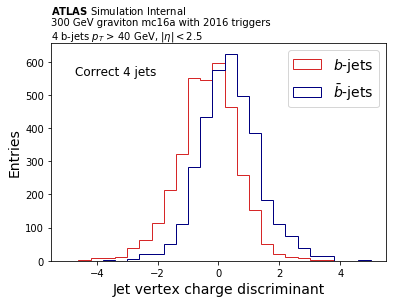

In [91]:
smText = "$\mathbf{ATLAS}$ Simulation Internal\n"
smText += "{} mc16a with 2016 triggers\n".format('SM NR' if 'SM' in physicsSample else '300 GeV graviton')
smText += "4 b-jets $p_T$ > 40 GeV, $|\eta| < 2.5$"

nBins=25
myRange=(-5,5)

plt.hist(np.concatenate(b_jvcs),   nBins,myRange,color='C3',label='$b$-jets',histtype='step')
plt.hist(np.concatenate(bbar_jvcs),nBins,myRange,color='navy',label=r'$\bar{b}$-jets',histtype='step')

plt.xlabel('Jet vertex charge discriminant',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.legend(fontsize=14)

# Add a data tag
ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.07,0.9,'Correct 4 jets',ha='left',va='top',transform=ax.transAxes,fontsize=12)

plt.savefig('{}/fourGoodJets_bbar_jvc.pdf'.format(figDir),bbox_inches='tight')

plt.show()

Cool! We can *definitely* see the discrimination power here for the jets that we're using in our analysis!

I might be over interpretting the results, but it seems that there might even be a larger separation for the 300 GeV graviton than there was for the SM?

**What are my options?**
- I could add them up and take the absolute value. Values close to 0 would correspond to 
- I could multiply them together, then negative values would correspond to the correct pairing and positive values would correspond to the incorrect pairing.

I think the adding would probably work better then if one of them has a large error, this won't multiply another large value, but it probably isn't too difficult to check both options.

**Adding the jvcs**

In [92]:
badJets = df.badJets.values

In [93]:
N = np.sum(~badJets)

correct_mask = np.zeros((N,3)).astype(bool)
incorrect_mask = np.ones((N,3)).astype(bool)

for i,pidx in enumerate(df.loc[~badJets,'correctPair']):
    correct_mask[i,pidx] = True
    incorrect_mask[i,pidx] = False

In [94]:
pair0_hc1_addJvc = df.j0_jvc + df.j1_jvc
pair0_hc2_addJvc = df.j2_jvc + df.j3_jvc

pair1_hc1_addJvc = df.j0_jvc + df.j2_jvc
pair1_hc2_addJvc = df.j1_jvc + df.j3_jvc

pair2_hc1_addJvc = df.j0_jvc + df.j3_jvc
pair2_hc2_addJvc = df.j1_jvc + df.j2_jvc


In [95]:
hc1_addJvcs = np.vstack([pair0_hc1_addJvc,pair1_hc1_addJvc,pair2_hc1_addJvc]).T
hc2_addJvcs = np.vstack([pair0_hc2_addJvc,pair1_hc2_addJvc,pair2_hc2_addJvc]).T

In [96]:
hc1_addJvcs[~badJets].shape

(1220, 3)

In [97]:
badJets.shape

(1723,)

In [98]:
badJets.sum()

503

In [99]:
correct_mask.shape

(1220, 3)

Oh, I should also be careful to check if we've selected the correct jets or not!

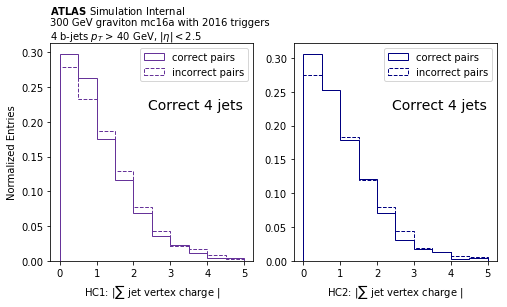

In [100]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8,4))

norm = np.sum(df.loc[~badJets,'mc_sf'])

nBins=10
myRange=(0,5)

ax1.hist(np.abs(hc1_addJvcs[~badJets][correct_mask]),
         nBins,myRange,color='rebeccapurple',
         histtype='step',label='correct pairs',
         weights=df.loc[~badJets,'mc_sf']/norm)
ax1.hist(np.abs(hc1_addJvcs[~badJets][incorrect_mask]),
         nBins,myRange,color='rebeccapurple',linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))

ax1.legend()
ax1.set_xlabel('HC1: $|\sum$ jet vertex charge $|$')
ax1.set_ylabel('Normalized Entries')

ax2.hist(np.abs(hc2_addJvcs[~badJets][correct_mask]),
         nBins,myRange,color='navy',
         histtype='step',label='correct pairs',
         weights=df.loc[~badJets,'mc_sf']/norm)
ax2.hist(np.abs(hc2_addJvcs[~badJets][incorrect_mask]),
         nBins,myRange,color='navy',linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))
ax2.set_xlabel('HC2: $|\sum$ jet vertex charge $|$')

ax2.legend()

ax1.text(0,1,smText,ha='left',va='bottom',transform=ax1.transAxes)

for ax in [ax1,ax2]:
    ax.text(0.95,0.75,'Correct 4 jets',ha='right',va='top',
            transform=ax.transAxes,fontsize=14)

plt.savefig('{}/fourGoodJets_hc1+2_addJvcs.pdf'.format(figDir),bbox_inches='tight')

plt.show()

Ok, so to derive an event level variable, I *could* maybe add these up? Or would one be anticipated to be better (like the subleading HC b/c we have fewer fragmenation tracks?)

It's not clear to me whether HC2 might actually be a better variable?

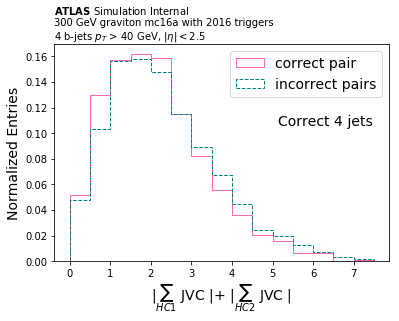

In [101]:
nBins=15
myRange=(0,7.5)

plt.hist(np.abs(hc1_addJvcs[~badJets][correct_mask])+np.abs(hc2_addJvcs[~badJets][correct_mask]),
         nBins,myRange,color='hotpink',
         histtype='step',label='correct pair',
         weights=df.loc[~badJets,'mc_sf']/norm)
plt.hist(np.abs(hc1_addJvcs[~badJets][incorrect_mask])+np.abs(hc2_addJvcs[~badJets][incorrect_mask]),
         nBins,myRange,color='teal',linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))

plt.legend(fontsize=14)
plt.xlabel('$|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)

ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.95,0.675,'Correct 4 jets',ha='right',va='top',
        transform=ax.transAxes,fontsize=14)

plt.savefig('{}/fourGoodJets_absAddJvcs.pdf'.format(figDir),bbox_inches='tight')

plt.show()

*Not bad!* I'd be interested to also see
1. How these depend with $m_{hh}$
2. Whether this distribution provides any discrimination power for the cases where min MDR is *wrong*

**But I guess I really just need higher stats for these studies!**

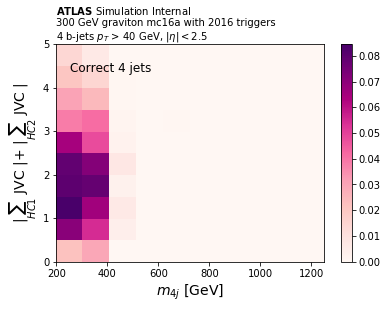

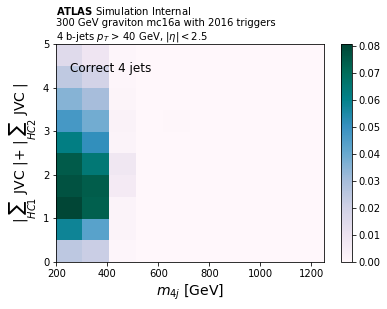

In [102]:
sumAbsJvc = np.abs(hc1_addJvcs[~badJets])+np.abs(hc2_addJvcs[~badJets])

'''
Correct pair
'''
plt.figure()
n_right,edg,_,_ = plt.hist2d(df.loc[~badJets,'m4j'], sumAbsJvc[correct_mask],
                           bins=10,range=[(200,1250),(0,5)],
                           cmap="RdPu",
                           weights=df.loc[~badJets,'mc_sf']/norm)
plt.colorbar()

plt.xlabel('$m_{4j}$ [GeV]',fontsize=14)
plt.ylabel('$|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$',fontsize=14)

ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.05,0.92,'Correct 4 jets',ha='left',va='top',
        transform=ax.transAxes,fontsize=12)

plt.savefig('{}/fourGoodJets_absAddJvcs_vs_m4j_correct.pdf'.format(figDir),bbox_inches='tight')


'''
Incorect pairs
'''
plt.figure()
n_wrong,edg,_,_ = plt.hist2d(np.concatenate(np.ones((N,2))*df.loc[~badJets,'m4j'].values.reshape(-1,1)), 
                           sumAbsJvc[incorrect_mask],
                           bins=10,range=[(200,1250),(0,5)],
                           cmap="PuBuGn",
                           weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))
plt.colorbar()

plt.xlabel('$m_{4j}$ [GeV]',fontsize=14)
plt.ylabel('$|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$',fontsize=14)

ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.05,0.92,'Correct 4 jets',ha='left',va='top',
        transform=ax.transAxes,fontsize=12)

plt.savefig('{}/fourGoodJets_absAddJvcs_vs_m4j_incorrect.pdf'.format(figDir),bbox_inches='tight')

plt.show()


Maybe I should try normalizing so that each column sums to 1 to demonstrate that I'm not seeing a $m_{4j}$ dependence in this variable?

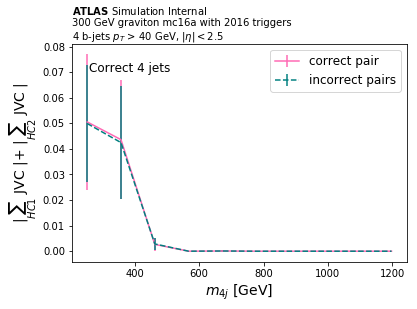

In [103]:
x = 0.5 * (edg[:-1]+edg[1:])

plt.errorbar(x,np.mean(n_right,axis=1),np.std(n_right,axis=1),
             color='hotpink',label='correct pair')
plt.errorbar(x,np.mean(n_wrong,axis=1),np.std(n_wrong,axis=1),
             color='teal',linestyle='--',label='incorrect pairs')

plt.xlabel('$m_{4j}$ [GeV]',fontsize=14)
plt.ylabel('$|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$',fontsize=14)

plt.legend(fontsize=12)

ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.05,0.92,'Correct 4 jets',ha='left',va='top',
        transform=ax.transAxes,fontsize=12)

plt.savefig('{}/fourGoodJets_absAddJvcs_avg_m4j.pdf'.format(figDir),bbox_inches='tight')

plt.show()

These are really *huge* error bars... Does this mean this variable doesn't provide any discrimination, or thatI just didn't calculate something right?

Note: This plot really doesn't provide any useful info for the graviton because there isn't an $m_{4j}$ distribution, it's really peaked more sharply.


**Next:** I want to see if this provides any *unique* info c.f. the min $\Delta R_{jj}^{HC 1}$ pairing.

Ok, so how do I get the min $\Delta R_{jj}^{HC 1}$???

In [104]:
dRs = np.where(df[['pair{}_HC1_pt'.format(i) for i in range(3)]].values > df[['pair{}_HC2_pt'.format(i) for i in range(3)]].values,
               df[['pair{}_HC1_dRjj'.format(i) for i in range(3)]],
               df[['pair{}_HC2_dRjj'.format(i) for i in range(3)]])

i_min_dR = np.argmin(dRs,axis=1)

In [105]:
dRs

array([[2.04806083, 0.53282248, 1.60754595],
       [0.46736292, 0.75977725, 0.65791722],
       [0.97999861, 1.32980886, 0.84477653],
       ...,
       [3.10172048, 1.31070642, 1.90205536],
       [1.06767551, 2.35632068, 2.89532188],
       [2.47625169, 1.56222958, 2.01262541]])

In [106]:
i_min_dR

array([1, 0, 2, ..., 1, 0, 1])

In [107]:
np.sum(df.loc[(i_min_dR == df.correctPair) & (~badJets),'mc_sf']) / np.sum(df.loc[~badJets,'mc_sf'])

0.2483745976790262

Maybe it would be a good idea to make a cutflow here given that I had the correct 4 jets? (Or, I could also do this *later*).

Ok, this 90% correct is roughly what I was seeing with the baseline analysis as well. 

I think it would be really interesting to see how the accuracy of the algorthim depends on $m_{hh}$, and then look at a comparison of event level and HC variables for the correct and incorrect pairings.

In [108]:
np.sum(df.MDR)/np.sum(df.fourGoodJets)

0.8839233894370284

Ok, so this is a *great* example, we really are fucking up in terms of accuracy with min $\Delta R_{jj}^{HC1}$, even though the current pairing alg is 90% accurate.

See if there's *any* discrimination in this variable for cases where min $\Delta R_{jj}^{HC 1}$ fails.

In [109]:
dRs = np.where(df.loc[~badJets,['pair{}_HC1_pt'.format(i) for i in range(3)]].values > df.loc[~badJets,['pair{}_HC2_pt'.format(i) for i in range(3)]].values,
               df.loc[~badJets,['pair{}_HC1_dRjj'.format(i) for i in range(3)]],
               df.loc[~badJets,['pair{}_HC2_dRjj'.format(i) for i in range(3)]])

i_min_dR_goodJets = np.argmin(dRs,axis=1)

In [110]:
mindR_wrong = (i_min_dR_goodJets != df.loc[~badJets,'correctPair'].values).reshape(-1,1)

In [111]:
mindR_wrong.shape

(1220, 1)

In [112]:
correct_mask.shape

(1220, 3)

In [113]:
i_min_dR.shape

(1723,)

In [114]:
len(~badJets & (i_min_dR != df.correctPair))

1723

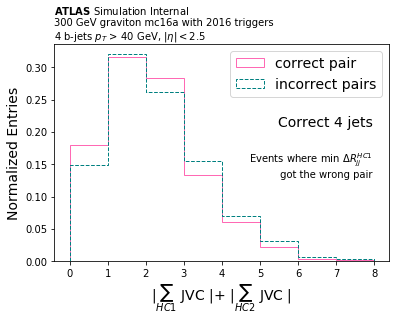

In [115]:
mask = ((~badJets) & (i_min_dR != df.correctPair))

wrongPairNorm = np.sum(df.loc[mask,'mc_sf'])
Nwrong = np.sum(mask)

nBins=8
myRange=(0,8)

plt.hist((np.abs(hc1_addJvcs)+np.abs(hc2_addJvcs))[~badJets][correct_mask & mindR_wrong],
         nBins,myRange,color='hotpink',
         histtype='step',label='correct pair',
         weights=df.loc[mask,'mc_sf'] / wrongPairNorm)
plt.hist((np.abs(hc1_addJvcs)+np.abs(hc2_addJvcs))[~badJets][incorrect_mask & mindR_wrong],
         nBins,myRange,color='teal',linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((Nwrong,2))*df.loc[mask,'mc_sf'].values.reshape(-1,1))/(2*wrongPairNorm))

plt.legend(fontsize=14)
plt.xlabel('$|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)

ax = plt.gca()
ax.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)
ax.text(0.95,0.67,'Correct 4 jets',ha='right',va='top',
        transform=ax.transAxes,fontsize=14)

ax.text(0.95,0.525,'Events where min $\Delta R_{jj}^{HC 1}$\n got the wrong pair',
        ha='right',va='top',
        transform=ax.transAxes,fontsize=10)

plt.savefig('{}/fourGoodJets_absAddJvcs_mindR1_wrong.pdf'.format(figDir),bbox_inches='tight')

plt.show()

Ok... could I try a 2d or 3d cut?

I was curious about what the difference was between a std classifier with logistic regression and an SVM, and I came across this [interesting blog post](https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f) that suggested to try the linear classifier first, and then move onto SVMs... something that I thought was interesting to keep in mind. 

The main different was just that the SVM uses a different loss function.


In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
?LogisticRegression

In [118]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000,
                              multi_class='multinomial')

**Step 1:** Train-test split

I think I only want to train on cases where I selected the correct 4 jets!


In [119]:
col_pt1 = ['pair{}_HC1_pt'.format(i) for i in range(3)]
col_pt2 = ['pair{}_HC2_pt'.format(i) for i in range(3)]
col_dR1 = ['pair{}_HC1_dRjj'.format(i) for i in range(3)]
col_dR2 = ['pair{}_HC2_dRjj'.format(i) for i in range(3)]

x1 = np.abs(hc1_addJvcs)+np.abs(hc2_addJvcs)
x2 = np.where(df[col_pt1].values > df[col_pt2].values, 
              df[col_dR1].values, df[col_dR2].values)

In [120]:
X = np.concatenate([x1,x2],axis=1)

In [121]:
x1[~badJets].shape

(1220, 3)

In [122]:
df.loc[~badJets,'correctPair'].min()

0

**Step 2:** Training

In [123]:
logistic.fit(X[~badJets],df.loc[~badJets,'correctPair'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**Step 3: Evaluation**

The question we're really trying to answer is whether we can improve the accuracy w/o sculpting the mass plane too much.


In [124]:
df['mvaPair'] = logistic.predict(X)

In [125]:
np.sum(df.loc[~badJets,'mvaPair'] == df.loc[~badJets,'correctPair']) / np.sum(~badJets)

0.4

Ok, this corresponds to a *factor of 50% gain in accuracy* without sculpting the systematics.

In [126]:
chosen_mask = np.zeros((len(df.index),3)).astype(bool)

for i,pidx in enumerate(df['mvaPair']):
    chosen_mask[i,pidx] = True

In [127]:
m_h1 = df[['pair{}_HC1_m'.format(i) for i in range(3)]].values[chosen_mask]
m_h2 = df[['pair{}_HC2_m'.format(i) for i in range(3)]].values[chosen_mask]

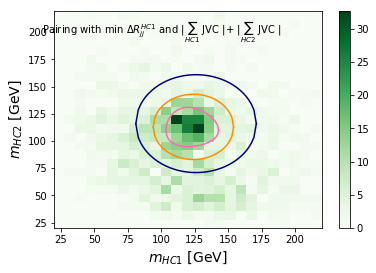

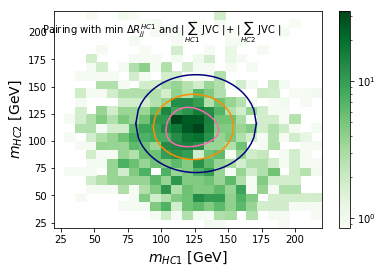

In [141]:
text = 'Pairing with min $\Delta R_{jj}^{HC1}$ and $|\sum_{HC1}$ JVC $|$+ $|\sum_{HC2}$ JVC $|$'
cmap = "BuPu" if "SM" in physicsSample else "Greens"
massPlane(m_h1, m_h2, df['mc_sf'], cmap=cmap, nBins=25,varRange=(20,220),text=text,
          figDir=figDir,baseFigName='fourGoodJets',tag='mva')

**Ultimate question...** How much does it sculpt the background?

Ok, so if I'm considering a topo sample for the signal, I should consider a topo sample as well for the 2b background (at this point).

In [129]:
if reload:
    
    dfs = []
    for myFile in tqdm(glob.glob("../data/data_16_Topo-FEB2019/files/df_periodL_f_0.22_000041_entry_*.h5")):

        dfi = pd.read_hdf(myFile,key='df')
        loadMask = dfi.fourGoodJets & (dfi.nbtags == 2) & dfi[trigger]
        dfs.append(dfi.loc[loadMask, dfi.columns])

    df16 = pd.concat(dfs)

    df16.to_hdf("../data/data_16_Topo-FEB2019/df_f_0.22.h5", key='df',mode='w')

else:
    
    df16 = pd.read_hdf("../data/data_16_Topo-FEB2019/df_f_0.22.h5",key='df')

In [130]:
if reload:
    
    dfs = []
    for myFile in tqdm(glob.glob("../data/data_15_Topo-FEB2019/files/df_period*_f_0.22_*_entry_*.h5")):

        dfi = pd.read_hdf(myFile,key='df')
        loadMask = dfi.fourGoodJets & (dfi.nbtags >= 2) & dfi['2015_triggers']
        dfs.append(dfi.loc[loadMask, dfi.columns])

    df15 = pd.concat(dfs)

    df15.to_hdf("../data/data_15_Topo-FEB2019/df_f_0.22.h5", key='df',mode='w')

else:
    
    df15 = pd.read_hdf("../data/data_15_Topo-FEB2019/df_f_0.22.h5",key='df')

In [131]:
len(df15)

45737

In [132]:
bkg_df = pd.concat([df15,df16])

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [133]:
len(bkg_df)

74142

In [134]:
bkg_df['pair0_hc1_addJvc'] = bkg_df.j0_jvc + bkg_df.j1_jvc
bkg_df['pair0_hc2_addJvc'] = bkg_df.j2_jvc + bkg_df.j3_jvc

bkg_df['pair1_hc1_addJvc'] = bkg_df.j0_jvc + bkg_df.j2_jvc
bkg_df['pair1_hc2_addJvc'] = bkg_df.j1_jvc + bkg_df.j3_jvc

bkg_df['pair2_hc1_addJvc'] = bkg_df.j0_jvc + bkg_df.j3_jvc
bkg_df['pair2_hc2_addJvc'] = bkg_df.j1_jvc + bkg_df.j2_jvc


In [135]:
col_jvc1 = ['pair{}_hc1_addJvc'.format(i) for i in range(3)]
col_jvc2 = ['pair{}_hc2_addJvc'.format(i) for i in range(3)]

bx1 = np.abs(bkg_df[col_jvc1].values)+np.abs(bkg_df[col_jvc2].values)
bx2 = np.where(bkg_df[col_pt1].values > bkg_df[col_pt2].values, 
               bkg_df[col_dR1].values, bkg_df[col_dR2].values)

In [136]:
bkg_X = np.concatenate((bx1,bx2),axis=1)
bkg_df['mvaPair'] = logistic.predict(bkg_X)

In [137]:
bkg_mask = np.zeros((len(bkg_df.index),3)).astype(bool)

for i,pidx in enumerate(bkg_df['mvaPair']):
    bkg_mask[i,pidx] = True
    
bkg_m_h1 = bkg_df[['pair{}_HC1_m'.format(i) for i in range(3)]].values[bkg_mask]
bkg_m_h2 = bkg_df[['pair{}_HC2_m'.format(i) for i in range(3)]].values[bkg_mask]    


In [138]:
np.min(bkg_m_h1),np.min(bkg_m_h2)

(22.17284857756882, 18.324137697868412)

In [139]:
200/8

25.0

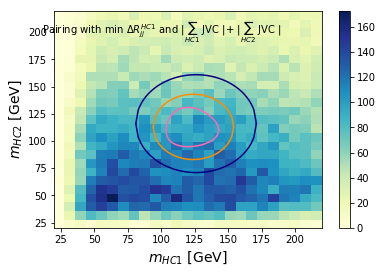

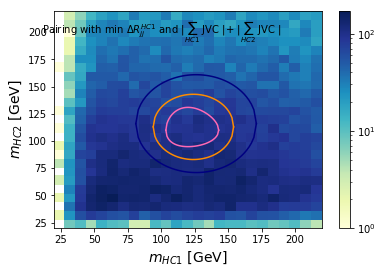

In [140]:
massPlane(bkg_m_h1, bkg_m_h2, np.ones(len(bkg_df.index)), 
          cmap="YlGnBu", nBins=25,varRange=(20,220),text=text,
          figDir=figDir,baseFigName='fourGoodJets',tag='mva_bkg')

Ok, I think these stats are ok. I can just make the bins a *bit* coarser, and I will have demonstrated the point quite well.

But, I think one more thing that *might* be worth mentioning is that I should probably not just compare the massplane distributions, but also the # of background and signal events in the SR for each of these ... and the accuracy of all of these methods.

Rafael said it would also be worth checking the multiplication of these quantities as well.

In [142]:
pair0_hc1_mulJvc = df.j0_jvc * df.j1_jvc
pair0_hc2_mulJvc = df.j2_jvc * df.j3_jvc

pair1_hc1_mulJvc = df.j0_jvc * df.j2_jvc
pair1_hc2_mulJvc = df.j1_jvc * df.j3_jvc

pair2_hc1_mulJvc = df.j0_jvc * df.j3_jvc
pair2_hc2_mulJvc = df.j1_jvc * df.j2_jvc

In [143]:
hc1_mulJvcs = np.vstack([pair0_hc1_mulJvc,pair1_hc1_mulJvc,pair2_hc1_mulJvc]).T
hc2_mulJvcs = np.vstack([pair0_hc2_mulJvc,pair1_hc2_mulJvc,pair2_hc2_mulJvc]).T

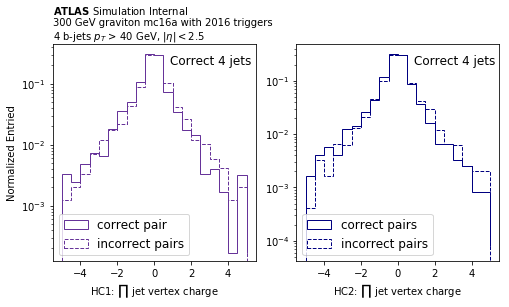

In [144]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8,4))

nBins=20
myRange=(-5,5)

ax1.hist(hc1_mulJvcs[~badJets][correct_mask],
         nBins,myRange,color='rebeccapurple',log=True,
         histtype='step',label='correct pair',
         weights=df.loc[~badJets,'mc_sf']/norm)
ax1.hist(hc1_mulJvcs[~badJets][incorrect_mask],
         nBins,myRange,color='rebeccapurple',log=True,linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))

ax1.legend(loc='lower left',fontsize=12)
ax1.set_xlabel('HC1: $\prod$ jet vertex charge')
ax1.set_ylabel('Normalized Entried')

ax2.hist(hc2_mulJvcs[~badJets][correct_mask],
         nBins,myRange,color='navy',log=True,
         histtype='step',label='correct pairs',
         weights=df.loc[~badJets,'mc_sf']/norm)
ax2.hist(hc2_mulJvcs[~badJets][incorrect_mask],
         nBins,myRange,color='navy',log=True,linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((N,2))*df.loc[~badJets,'mc_sf'].values.reshape(-1,1))/(2*norm))
ax2.set_xlabel('HC2: $\prod$ jet vertex charge')

ax2.legend(loc='lower left',fontsize=12)

ax1.text(0,1,smText,ha='left',va='bottom',transform=ax1.transAxes)
ax1.text(0.98,0.95,'Correct 4 jets',ha='right',va='top',
         transform=ax1.transAxes,fontsize=12)
ax2.text(0.98,0.95,'Correct 4 jets',ha='right',va='top',
         transform=ax2.transAxes,fontsize=12)

plt.savefig('{}/fourGoodJets_hc1+2_mulJvcs.pdf'.format(figDir),bbox_inches='tight')

plt.show()

Rafael also wanted me to look at events where the min MDR got the wrong pair.

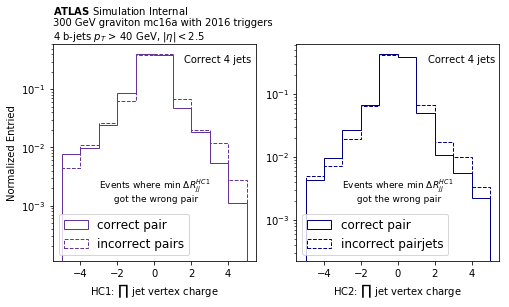

In [145]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8,4))

nBins=10
myRange=(-5,5)

ax1.hist(hc1_mulJvcs[~badJets][correct_mask & mindR_wrong],
         nBins,myRange,color='rebeccapurple',log=True,
         histtype='step',label='correct pair',
         weights=df.loc[mask,'mc_sf']/wrongPairNorm)
ax1.hist(hc1_mulJvcs[~badJets][incorrect_mask & mindR_wrong],
         nBins,myRange,color='rebeccapurple',log=True,linestyle='--',
         histtype='step',label='incorrect pairs',
         weights=np.concatenate(np.ones((Nwrong,2))*df.loc[mask,'mc_sf'].values.reshape(-1,1))/(2*wrongPairNorm))

ax1.legend(loc='lower left',fontsize=12)
ax1.set_xlabel('HC1: $\prod$ jet vertex charge')
ax1.set_ylabel('Normalized Entried')

ax2.hist(hc2_mulJvcs[~badJets][correct_mask & mindR_wrong],
         nBins,myRange,color='navy',log=True,
         histtype='step',label='correct pair',
         weights=df.loc[mask,'mc_sf']/wrongPairNorm)
ax2.hist(hc2_mulJvcs[~badJets][incorrect_mask & mindR_wrong],
         nBins,myRange,color='navy',log=True,linestyle='--',
         histtype='step',label='incorrect pairjets',
         weights=np.concatenate(np.ones((Nwrong,2))*df.loc[mask,'mc_sf'].values.reshape(-1,1))/(2*wrongPairNorm))
ax2.set_xlabel('HC2: $\prod$ jet vertex charge')

ax2.legend(loc='lower left',fontsize=12)

ax1.text(0,1,smText,ha='left',va='bottom',transform=ax1.transAxes)

for ax in [ax1,ax2]:
    ax.text(0.98,0.95,'Correct 4 jets',ha='right',va='top',
         transform=ax.transAxes,fontsize=10)
    ax.text(0.5,0.4,'Events where min $\Delta R_{jj}^{HC 1}$\n got the wrong pair',
            ha='center',va='top',
            transform=ax.transAxes,fontsize=9)

plt.savefig('{}/fourGoodJets_hc1+2_mulJvcs_mindR1_wrong.pdf'.format(figDir),bbox_inches='tight')

plt.show()

Ok, so this still provides some discrimination power, we tend to have more correct pairs with negative values, and incorrect pairs with positive values.

The correct pair should have *both* HCs as negative with this variable, and since I'm making these plots assuming that we got the correct 4 jets, this means one of the incorrect pairs should have a ...

Ok, so I don't think this multiplication is helping that much to provide discrimination power, so I'll abandon this thread.